In [2]:
#import the required libraries 
import pandas
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle


In [3]:
#import the dataset which contains various attributes and data about the applicants and chances of admission

df = pandas.read_csv('Admission_Predict.csv', index_col=0)

In [4]:
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
#check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [6]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

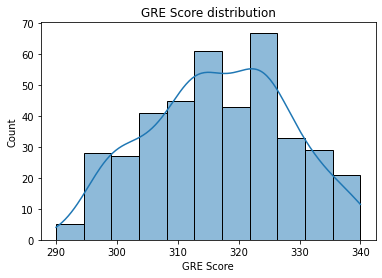

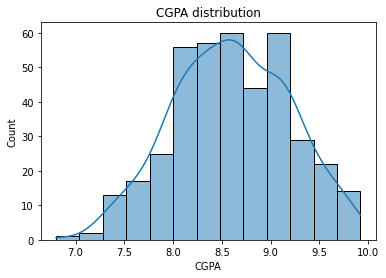

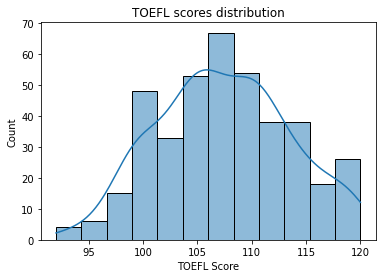

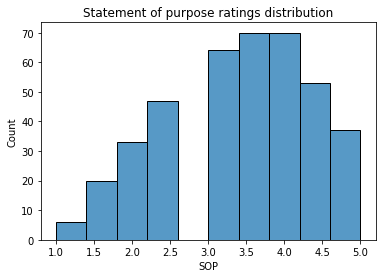

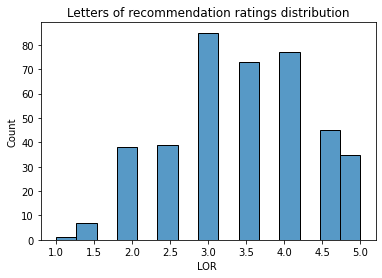

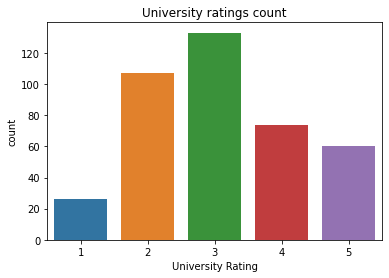

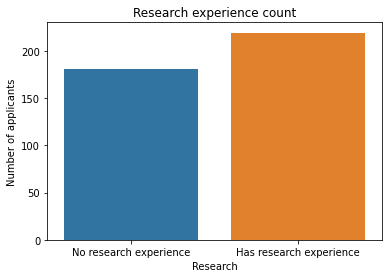

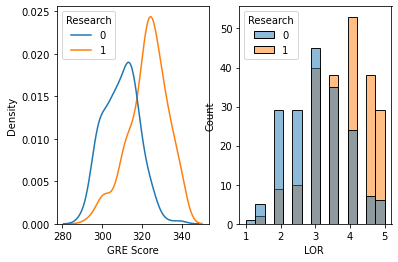

In [11]:
#It seems like there aren't any missing values

#Distribution of various scores and data points

plot = sns.histplot(x=df['GRE Score'], kde = True)
plt.title("GRE Score distribution")
plt.show()

plot = sns.histplot(x=df['CGPA'], kde = True)
plt.title("CGPA distribution")
plt.show()

plot = sns.histplot(x=df['TOEFL Score'], kde= True)
plt.title('TOEFL scores distribution')
plt.show()

plot = sns.histplot(x=df['SOP'])
plt.title('Statement of purpose ratings distribution')
plt.show()

plot = sns.histplot(x=df['LOR '])
plt.title('Letters of recommendation ratings distribution')
plt.show()


#Look at various counts of university ratings and research experience

plot = sns.countplot(x=df['University Rating'])
plt.title('University ratings count')
plt.show()

#fig, ax = plt.subplots(figsize=(7,7))
plot = sns.countplot(x=df['Research'])
plt.ylabel('Number of applicants')

plot.set_xticklabels(['No research experience', 'Has research experience'])
plt.title('Research experience count')
plt.show()

#Create multiple plots in the same figure
#fig, (ax_kde, ax_hist) = plt.subplots(figsize=(6,4), nrows=1, ncols=2)

#sns.histplot(x= df['LOR '], hue=df['Research'], ax=ax_hist)
#sns.kdeplot(x= df['GRE Score'], hue=df['Research'], ax=ax_kde)


#plt.show()




In [186]:
#It seems that applicants come from all kinds of backgrounds with different levels of academic achievement and test scores.
#Furthermore, it seems most applicants come from a tier 3 undergraduate university and a somewhat greater number have research
#experience than those who don't
#There is some restriction of range for test scores and CGPA. This is because all the applicants in this data set scored around
# or above the 50th percentile on the GRE and TOEFL.

df['CGPA'].min()
#We can see that the lowest CGPA was 6.8. Our predictions, when we make them, will be the most accurate for GPAs between
# 6.8 and 10 because we only have data for this range and would have to estimate the admission chances for the GPAs below this range


6.8

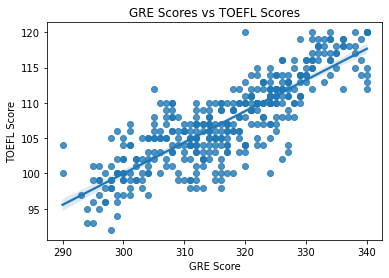

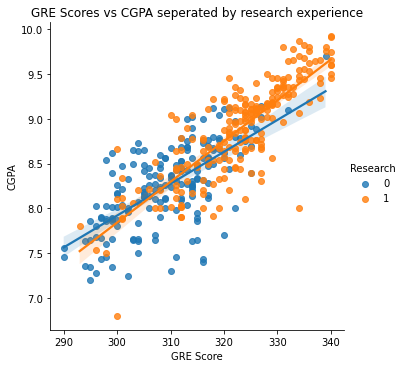

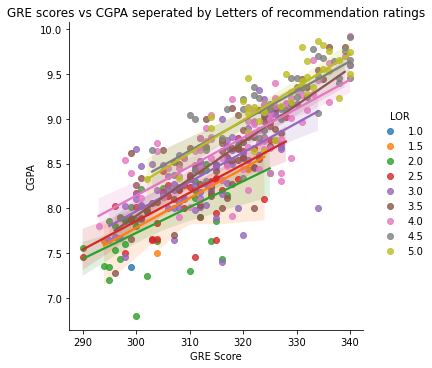

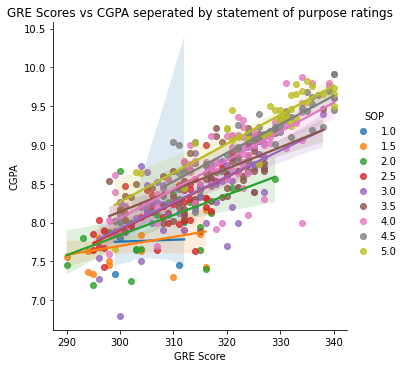

In [187]:
#It is important to see what factors are correlated with each other and responsible for admissions

figure = sns.regplot(x='GRE Score', y='TOEFL Score', data = df)
plt.title('GRE Scores vs TOEFL Scores')
plt.show()


figure = sns.lmplot(x='GRE Score', y='CGPA', data=df, hue='Research')
plt.title('GRE Scores vs CGPA seperated by research experience')
plt.show()


figure = sns.lmplot(x='GRE Score', y='CGPA', data = df, hue='LOR ')
plt.title('GRE scores vs CGPA seperated by Letters of recommendation ratings')
plt.show()


figure = sns.lmplot(x='GRE Score', y='CGPA', data=df, hue='SOP')
plt.title('GRE Scores vs CGPA seperated by statement of purpose ratings')
plt.show()

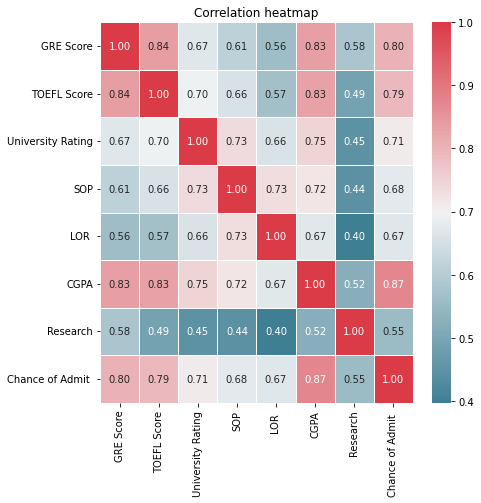

In [188]:
'''
Applicants with higher GRE scores tend to get higher TOEFL scores possibly because both tests test general intelligence to some degree
and both have a verbal component. Applicants with higher GRE scores also tend to have higher GPAs possibly because GRE scores and grades both measure
general intelligence and conscientiousness to some degree. Applicants with higher GRE scores and GPAs are also more likly to have research experience, again,
due to being more motivated, intelligent and hard working. Students with higher GRE scores and grades also tend to have better recommendation letters
and statement of purpose letters though not always. It can be seen from the graph that the different best-fitted lines are not that far apart from each other
and there is a good deal of overlap.
'''

#A heatmap with correlations will help us better understand the magnitude of the relatedness between these different variables
# and to what extent they correlate with chances of admission

corMatrix = df.corr()

#makes fancy colours
colormap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(7,7))
#make heatmap 
sns.heatmap(corMatrix, cmap=colormap, linewidths=.5, annot=True, fmt=".2f",ax=ax)

plt.title('Correlation heatmap')

plt.show()






In [189]:
#Split the data to train and test a linear regression model

X = df.drop(['Chance of Admit '], axis=1)

y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = False)



In [197]:
linearModel = LinearRegression()

linearModel.fit(X_train.values,y_train)

prediction = linearModel.predict(X_test.values)

rSquared = r2_score(y_test,prediction)
rsquared = linearModel.score(X_train.values, y_train)

#Calculate sqrt mean squared error to check performance
#RMSE is generally used when we want to give more weight to observations that are further from the mean i.e. outliers
sqrtMSE = np.sqrt(mean_squared_error(prediction,y_test))
MAE = mean_absolute_error(prediction,y_test)



print("RSquared after scoring model using training dataset: {}".format(round(rsquared,2)))
print("RSquared after scoring model using test dataset: {}".format(round(rSquared,2)))
print("Root mean squared error: {}".format(round(sqrtMSE,2)))
print("Mean absolute error: {}".format(round(MAE,2)))

#Linear regression model seems to be decently accurate
# Scores on both the test and the training data are quite close indicating the model is neither underfitting nor overfitting

RSquared after scoring model using training dataset: 0.8
RSquared after scoring model using test dataset: 0.81
Root mean squared error: 0.06
Mean absolute error: 0.05


In [198]:
#Logistic classification model to classify data according to binary outcomes - admitted or rejected
#Assuming that chances above the median will result in the applicant getting accepted

mean_chance = df['Chance of Admit '].mean()
print(mean_chance)



0.72435


In [199]:
#Convert boolean to numerical value

y_train_outcome = (y_train > mean_chance).astype(int)
y_test_outcome = (y_test > mean_chance).astype(int)




#Standardize the data to reduce multicollinearity because our features are strongly correlated with each other
scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [200]:
logModel = LogisticRegression(max_iter = 400)

logModel.fit(X_train.values, y_train_outcome)

y_prediction = logModel.predict(X_test.values)

logModelScore = logModel.score(X_test.values, y_test_outcome)
#accuracyScore = accuracy_score(y_prediction, y_test_outcome)  - This does the same thing as above - calculate testing accuracy

logModelScore1 = logModel.score(X_train.values, y_train_outcome)



#Logistic regression seems to be quite accurate at classifying whether the applicant will be admitted or not.


print("Logistic regression score on testing data set: {}".format(round(logModelScore,2)))
print("Logistic regression score on training data set: {}".format(round(logModelScore1,2)))




Logistic regression score on testing data set: 0.9
Logistic regression score on training data set: 0.86


In [201]:
#Save the models to a pickle file so it can be implemented on the website


linearData = {'model' : linearModel}
logisticData = {'model' : logModel}


#Create pickle file of the Linear Regression Model
#with open('linearModel1.pkl', 'wb') as file:
  #  pickle.dump(linearData,file)


#with open('logisticModel.pkl', 'wb') as file:
   # pickle.dump(logisticData,file)





#checking if the file loads correctly
#with open('linearModel1.pkl', 'rb') as file:
#    loaded = pickle.load(file)


[0]
